<a href="https://colab.research.google.com/github/Griffox/Practice/blob/main/yolov10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jul  1 02:32:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv10

In [3]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 2.5 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.4 MB/s eta 0:00:00


In [5]:
!mkdir -p {HOME}/weights
!wget -p {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!ls -lh {HOME}/weights

total 0


# Inference with pre-trained model

/content


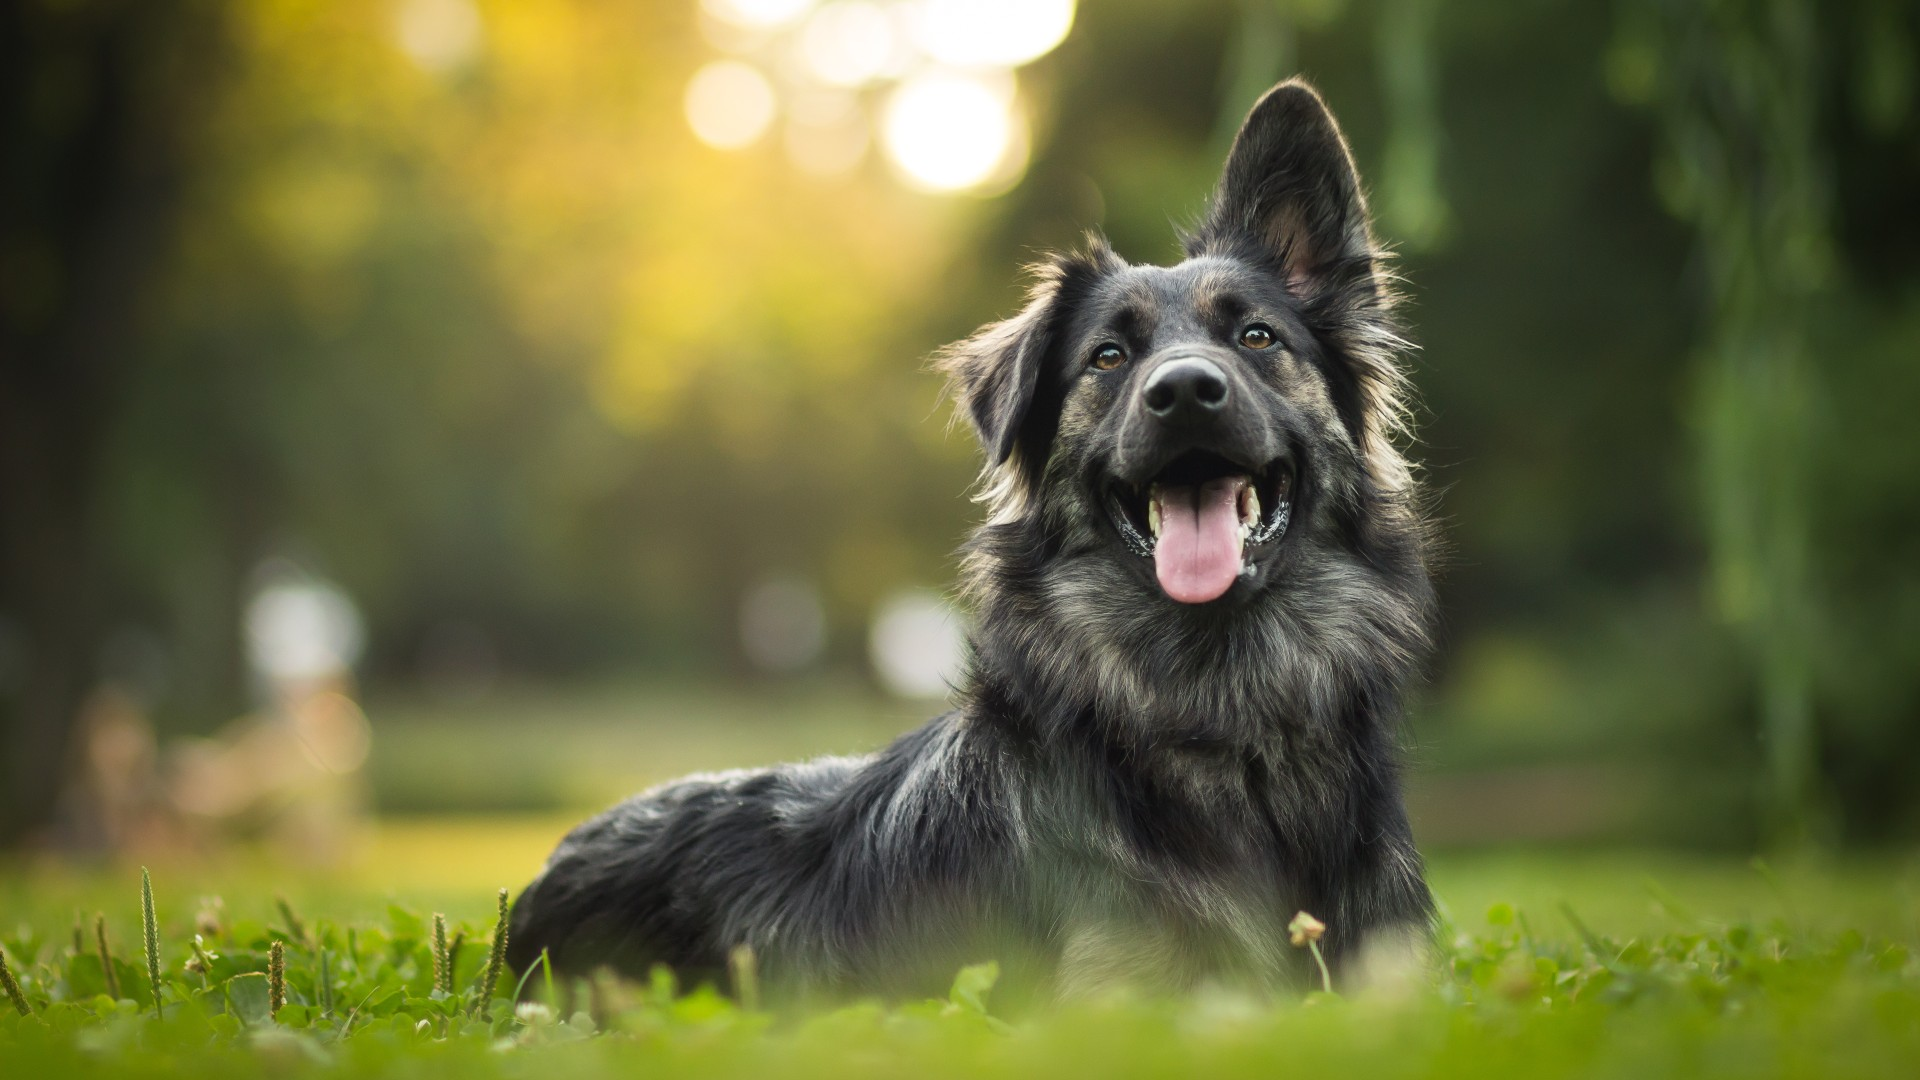

In [7]:
from IPython.display import Image

%cd {HOME}

Image(filename='/content/img.jpg', height=600)

In [8]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True model=/content/github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt conf=0.25 source=/content/img.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/img.jpg: 384x640 1 16, 143.9ms
Speed: 14.2ms preprocess, 143.9ms inference, 462.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt')
results = model(source=f'{HOME}/img.jpg', conf=0.25)


image 1/1 /content/img.jpg: 384x640 1 16, 95.9ms
Speed: 4.7ms preprocess, 95.9ms inference, 144.7ms postprocess per image at shape (1, 3, 384, 640)


In [10]:
print(results[0].boxes.xyxy)
print(results[0].boxes.conf)
print(results[0].boxes.cls)

tensor([[ 493.3656,   74.9338, 1458.6218, 1028.1212]], device='cuda:0')
tensor([0.9518], device='cuda:0')
tensor([16.], device='cuda:0')



0: 384x640 1 16, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


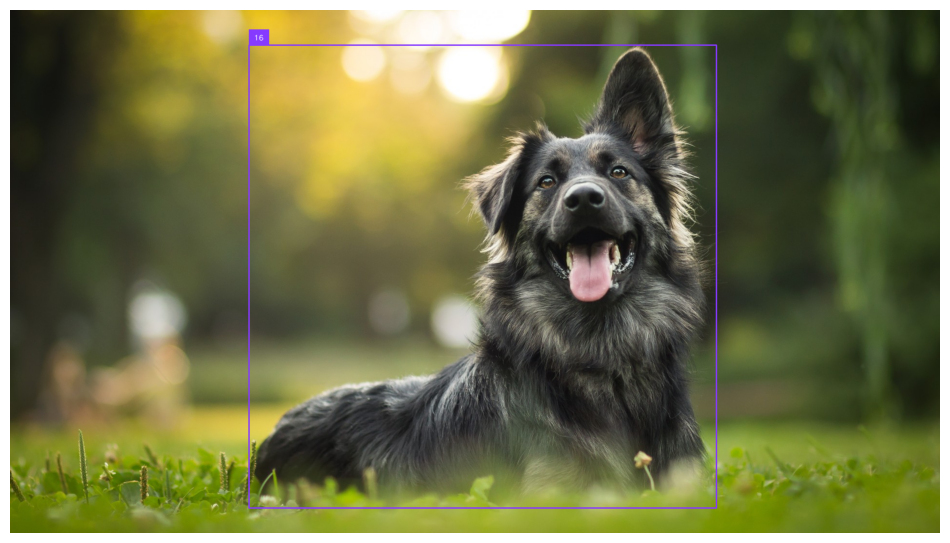

In [11]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt')
image = cv2.imread(f'{HOME}/img.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sg9j6tvLQta82jFTlEYw")
project = rf.workspace("plat-kendaraan").project("vehicle-and-license-plate")
version = project.version(3)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to vehicle-and-license-plate-3 in yolov8:: 100%|██████████| 11122/11122 [00:02<00:00, 4091.01it/s]


# Custom Training

In [15]:
%cd {HOME}

!yolo task=detect mode=train epochs=30 batch=64 plots=True \
model= {HOME}/github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt \
data = {dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt, data=/content/vehicle-and-license-plate-3/data.yaml, epochs=30, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=F

In [18]:
!yolo task=detect mode=predict conf=0.025 save=True model=/content/runs/detect/train3/weights/best.pt source=/content/b.mp4

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695976 parameters, 0 gradients, 8.2 GFLOPs

video 1/1 (frame 1/348) /content/b.mp4: 384x640 3 License_Plates, 1 cars, 102.4ms
video 1/1 (frame 2/348) /content/b.mp4: 384x640 3 License_Plates, 1 cars, 11.3ms
video 1/1 (frame 3/348) /content/b.mp4: 384x640 4 License_Plates, 2 carss, 9.5ms
video 1/1 (frame 4/348) /content/b.mp4: 384x640 2 License_Plates, 3 carss, 9.7ms
video 1/1 (frame 5/348) /content/b.mp4: 384x640 1 License_Plate, 2 carss, 9.0ms
video 1/1 (frame 6/348) /content/b.mp4: 384x640 2 License_Plates, 3 carss, 9.7ms
video 1/1 (frame 7/348) /content/b.mp4: 384x640 2 License_Plates, 2 carss, 9.3ms
video 1/1 (frame 8/348) /content/b.mp4: 384x640 3 License_Plates, 2 carss, 10.2ms
video 1/1 (frame 9/348) /content/b.mp4: 384x640 1 License_Plate, 2 carss, 9.1ms
video 1/1 (frame 10/348) /content/b.mp4: 384x640 1 License_Plate, 2 carss, 9.7ms
video 1/1 (frame 11/